# TEAMID PPNT2022TMID40507

# Visualizing and Predicting Heart Diseases with an Interactive Dashboard

# **Heart Disease Prediction using Machine Learning Approach**

Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1 cause of death in the US.The Heart Disease and Stroke Statistics—2019 Update from the American Heart Association indicates that:


*   116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.
*   On average, someone dies of CVD every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.
*   On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data.

In this machine learning project, we have collected the dataset from UCI (https://archive.ics.uci.edu/ml/datasets/statlog+(heart)) and we will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.




**Problem Statement**

*   Complete analysis of Heart Disease UCI dataset.
*   To predict whether a person has a heart disease or not based on the various biological and physical parameters.





**Machine Learning Algorithms**

*   Random Forest Classifier
*   K-Nearest Neighbors Classifier
*   Decision Tree Classifier
*   Naive Bayes Classifier

## **Import libraries**

Let's first import all the necessary libraries. We will use `numpy` and `pandas` to start with. For visualization, we will use`pyplot` subpackage of `matplotlib`, use `rcParams` to add styling to the plots and `rainbow` for colors and `seaborn`. For implementing Machine Learning models and processing of data, we will use the `sklearn` library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

For processing the data, we'll import a few libraries. To split the available dataset for testing and training, we'll use the `train_test_split` method. To scale the features, we are using `StandardScaler`.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

ModuleNotFoundError: No module named 'mlxtend'

For model validation, we'll import a few libraries.

In [4]:
#extra
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFwe, f_regression

Next, we will import all the Machine Learning algorithms

*   K-Nearest Neighbors Classifier
*   Random Forest Classifier
*   Decision Tree Classifier
*   Naive Bayes Classifier


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## **Import dataset**

Now that we have all the libraries we will need, we can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. We'll use the pandas `read_csv` method to read the dataset.

In [7]:
dataset = pd.read_csv('dataset.csv',sep=',',encoding="utf-8")

### **Data Preparation and Data Exploration**

In [8]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:
dataset.shape

(270, 14)

The dataset is now loaded into the variable dataset. We'll just take a glimpse of the data using the `desribe()` and `info()` methods before we actually start processing and visualizing it.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


Looks like the dataset has a total of 270 rows and there are no missing values. There are a total of 13 features along with one target value which we wish to find.

In [12]:
dataset.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564.

In [14]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [15]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [16]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

So, we have no missing values

In [17]:
dataset.apply(lambda x:len(x.unique()))


age          41
sex           2
cp            4
trestbps     47
chol        144
fbs           2
restecg       3
thalach      90
exang         2
oldpeak      39
slope         3
ca            4
thal          3
target        2
dtype: int64

In [18]:
print('cp ',dataset['cp'].unique())
print('fbs ',dataset['fbs'].unique())
print('restecg ',dataset['restecg'].unique())
print('exang ',dataset['exang'].unique())
print('slope ',dataset['slope'].unique())
print('ca ',dataset['ca'].unique())
print('thal ',dataset['thal'].unique())


cp  [4 3 2 1]
fbs  [0 1]
restecg  [2 0 1]
exang  [0 1]
slope  [2 1 3]
ca  [3 0 1 2]
thal  [3 7 6]


### **Dataset Description:**

This dataset consists of 13 features and a target variable. The detailed description of all the features are as follows:

1. **Age**: Patients Age in years (Numeric)

---

2. **Sex**: Gender of patient (Male - 1, Female - 0)(Nominal)

---

3. **Chest Pain Type**: Type of chest pain experienced by patient categorized into :(Nominal)
* Value 1: Typical angina
* Value 2: Atypical angina
* Value 3: Non-anginal pain
* Value 4: Asymptomatic

(Angina: Angina is caused when there is not enough oxygen-rich blood flowing to a certain part of the heart. The arteries of the heart become narrow due to fatty deposits in the artery walls. The narrowing of arteries means that blood supply to the heart is reduced, causing angina.)

---

4. **resting bps**: Level of blood pressure at resting mode in mm/HG (Numerical)

---

5. **cholestrol**: Serum cholestrol in mg/dl (Numeric)
(Cholesterol means the blockage for blood supply in the blood vessels)

---

6. **fasting blood sugar**: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
(blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.)

---

7. **resting ecg**: Result of electrocardiogram while at rest are represented in 3 distinct values: (Nominal)
* Value 0: Normal
* Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria.

( ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening)

---

8. **oldpeak**: Exercise induced ST-depression in comparison with the state of rest (Numeric)

(ST Depression is the difference between value of ECG at rest and after exercise.
An electrocardiogram records the electrical signals in your heart. It's a common and painless test used to quickly detect heart problems and monitor your heart's health. Electrocardiograms — also called ECGs or EKGs — are often done in a doctor's office, a clinic or a hospital room. ECG machines are standard equipment in operating rooms and ambulances. Some personal devices, such as smart watches.)

---

9. **ST slope**: ST segment measured in terms of slope during peak exercise (Nominal) 
* Value 1: Upsloping
* Value 2: Flat
* Value 3: Downsloping

---

10. **ca**: Number of major blood vessels (0-3)(Numeric)

(Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object. In its primary application of medical imaging, a fluoroscope allows a physician to see the internal structure and function of a patient, so that the pumping action of the heart or the motion of swallowing, for example, can be watched)

---

11. **exang**: Exercise induced angina (1 = yes; 0 = no)

(is chest pain while exercising or doing any physical activity.)

---

12. **thal**: Thalium stress test 
* Value 3: normal
* Value 6: fixed defect
* Value 7: reversibe defect

---

13. **thalach**: Maximum heart rate achieved in bpm(Numeric)

---
---

**Target variable**
14. **target**: It is the target variable which we have to predict 2 means patient is suffering from heart risk and 1 means patient is normal. (1 = no disease; 2 = disease)

## **Data Visualization**
Now let's see various visual representations of the data to understand more about relationship between various features.

### **Distribution of Heart disease (target variable)**

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

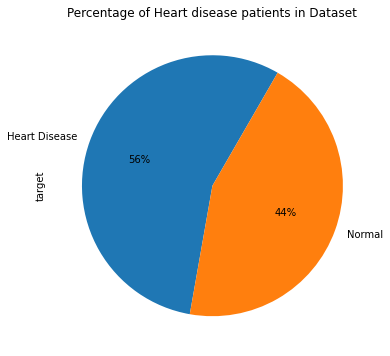

In [19]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(14,6))

ax1 = dataset['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')
plt.show()

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

In [20]:
y = dataset["target"]

1    150
2    120
Name: target, dtype: int64


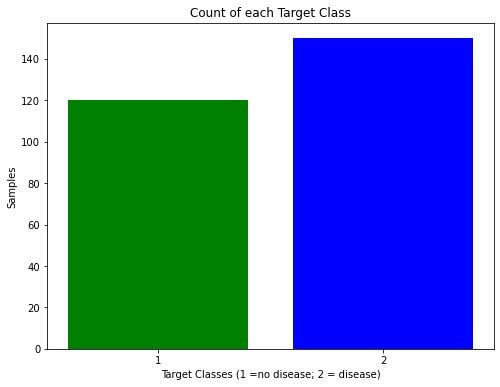

In [21]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['blue', 'green'])
plt.xticks([1, 2])
plt.xlabel('Target Classes (1 =no disease; 2 = disease)')
plt.ylabel('Samples')
plt.title('Count of each Target Class')
target_temp = dataset.target.value_counts()
print(target_temp)

From the total dataset of 270 patients, 150 (56%) have a heart disease (target=2)

Next, we'll take a look at the histograms for each variable.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

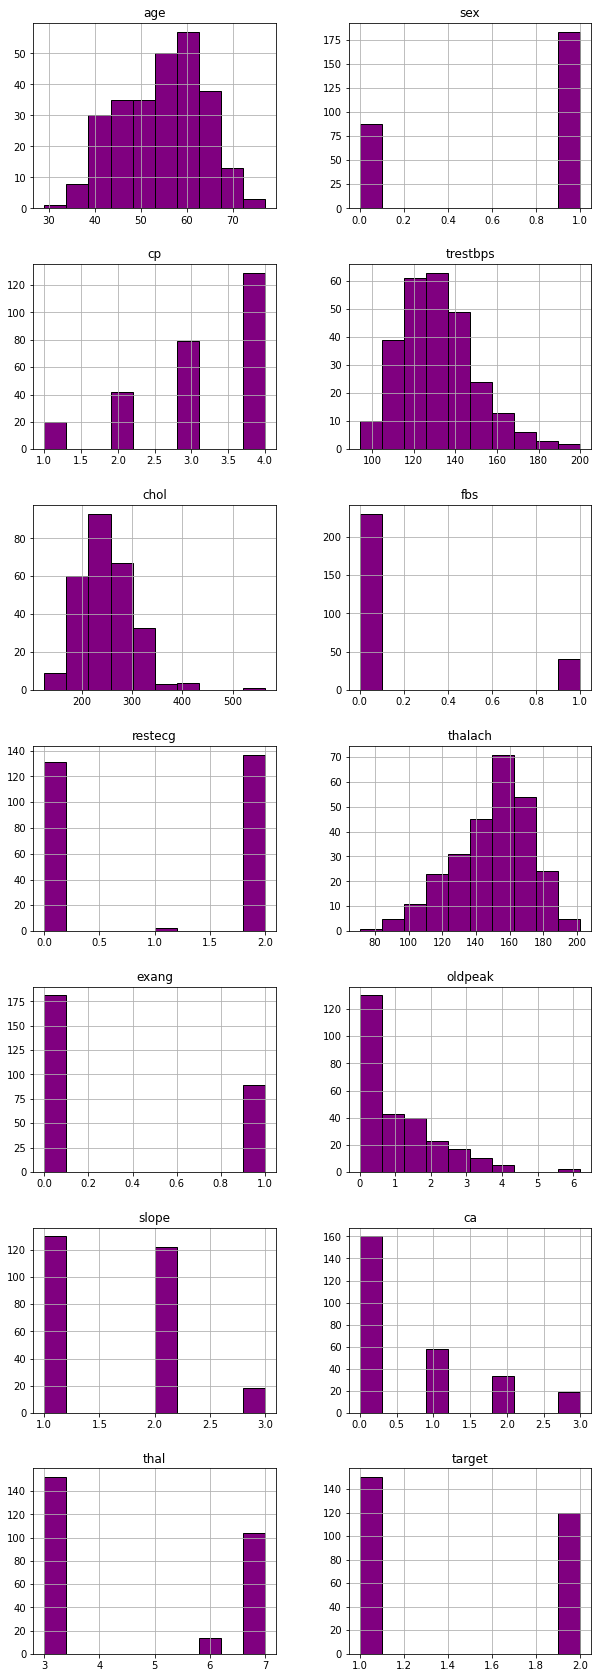

In [22]:
dataset.hist(edgecolor='black',layout = (7, 2),
            figsize = (10, 30),
            color=['purple'])

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

## **Exploratory Data Analysis (EDA)**

### **Gender distribution based on heart disease**

In [23]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

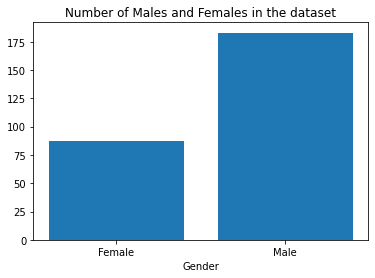

In [24]:
# Number of males and females
F = dataset[dataset["sex"] == 0].count()["target"]
M = dataset[dataset["sex"] == 1].count()["target"]

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()


**Heart Disease frequency for gender**

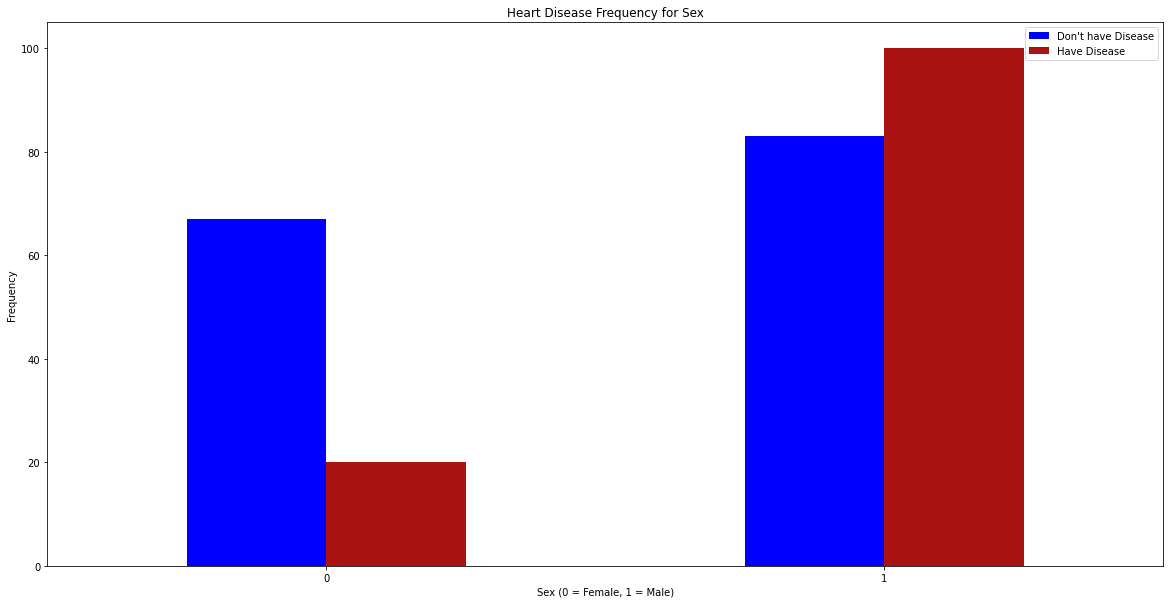

In [25]:
pd.crosstab(dataset.sex,dataset.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [26]:
countFemale = len(dataset[dataset.sex == 0])
countMale = len(dataset[dataset.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(dataset.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(dataset.sex))*100))

Percentage of Female Patients:32.22%
Percentage of Male Patients:67.78%


### **Age distribution based on heart disease**

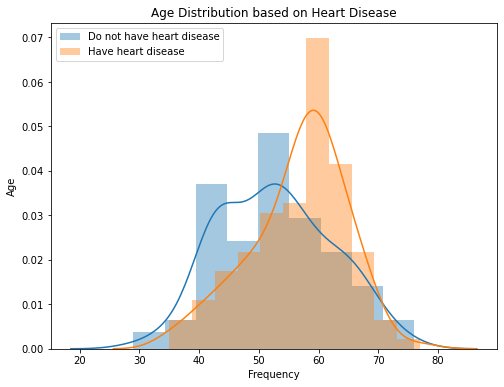

In [27]:
# Display age distribution based on heart disease
sns.distplot(dataset[dataset['target'] == 1]['age'], label='Do not have heart disease')
sns.distplot(dataset[dataset['target'] == 2]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

Get min, max and average of the age of the people do not have heart disease

In [28]:
print('Min age of people who do not have heart disease: ', min(dataset[dataset['target'] == 1]['age']))
print('Max age of people who do not have heart disease: ', max(dataset[dataset['target'] == 1]['age']))
print('Average age of people who do not have heart disease: ', dataset[dataset['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.70666666666666


Get min, max and average of the age of the people have heart disease

In [29]:
print('Min age of people who have heart disease: ', min(dataset[dataset['target'] == 2]['age']))
print('Max age of people who have heart disease: ', max(dataset[dataset['target'] == 2]['age']))
print('Average age of people who have heart disease: ', dataset[dataset['target'] == 2]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.59166666666667


From the data, we can say that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people.  



**Heart Disease Frequency for ages**

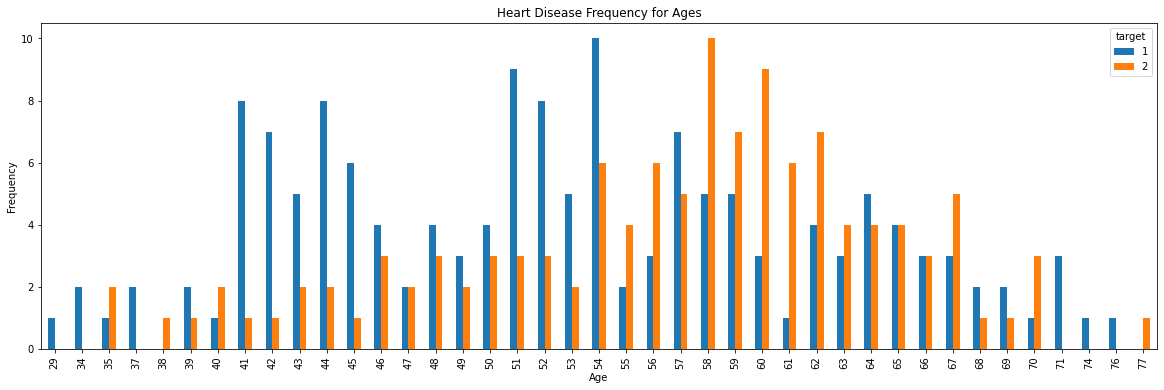

In [30]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()